<a href="https://www.kaggle.com/code/shahriarneub08/predicting-car-price-linear-and-knn-regression?scriptVersionId=258669342" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/automobile/automobile.csv


In [2]:
df = pd.read_csv("/kaggle/input/automobile/automobile.csv")
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  165 non-null    float64
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    object 
 16  engine-size        202 non

In [5]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [6]:
x = df.drop(["price"],axis=1)

In [7]:
x.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22


In [8]:
y = df["price"]

In [9]:
y.head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

## Handling missing data using Imputation method

In [10]:
x.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
dtype: int64

In [11]:
x.replace("?",np.nan,inplace=True)

In [12]:
x.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
dtype: int64

In [13]:
import seaborn as sns

In [14]:
x1 = x.copy()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='normalized-losses', ylabel='Count'>

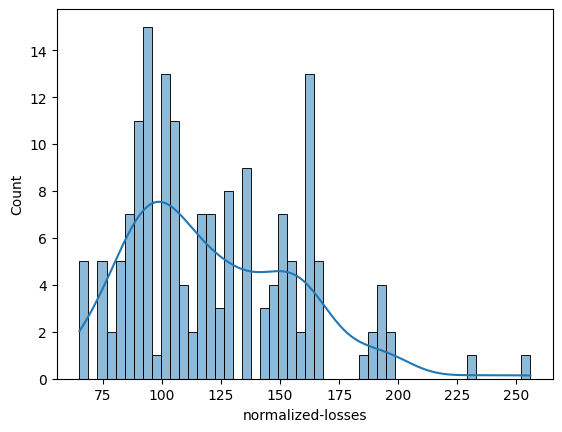

In [15]:
sns.histplot(x["normalized-losses"], kde=True,bins=50)

In [16]:
normalized_losses_Median = x["normalized-losses"].median()
normalized_losses_Median

115.0

In [17]:
x1["normalized-losses"]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


0        NaN
1        NaN
2        NaN
3      164.0
4      164.0
       ...  
197     95.0
198     95.0
199     95.0
200     95.0
201     95.0
Name: normalized-losses, Length: 202, dtype: float64

In [18]:
x["normalized-losses"] = x["normalized-losses"].fillna(normalized_losses_Median)

In [19]:
x["normalized-losses"]

0      115.0
1      115.0
2      115.0
3      164.0
4      164.0
       ...  
197     95.0
198     95.0
199     95.0
200     95.0
201     95.0
Name: normalized-losses, Length: 202, dtype: float64

In [20]:
x1["num-of-doors"][26:30]

26     NaN
27    four
28     two
29     two
Name: num-of-doors, dtype: object

In [21]:
x1["num-of-doors"][60:65]

60     NaN
61    four
62    four
63    four
64    four
Name: num-of-doors, dtype: object

In [22]:
num_of_doors_mode = x["num-of-doors"].mode()[0]
num_of_doors_mode

'four'

In [23]:
x["num-of-doors"] = x["num-of-doors"].fillna(num_of_doors_mode)

In [24]:
x["num-of-doors"][26:30]

26    four
27    four
28     two
29     two
Name: num-of-doors, dtype: object

In [25]:
x["num-of-doors"][60:65]

60    four
61    four
62    four
63    four
64    four
Name: num-of-doors, dtype: object

In [26]:
x["bore"]

0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
       ... 
197    3.78
198    3.58
199    3.01
200    3.78
201    3.78
Name: bore, Length: 202, dtype: object

In [27]:
x["bore"] = x["bore"].astype(float)

In [28]:
x["bore"]

0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
       ... 
197    3.78
198    3.58
199    3.01
200    3.78
201    3.78
Name: bore, Length: 202, dtype: float64

In [29]:
x1["bore"][51:60]

51    3.08
52     NaN
53     NaN
54     NaN
55     NaN
56    3.39
57    3.39
58    3.39
59    3.39
Name: bore, dtype: object

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bore', ylabel='Count'>

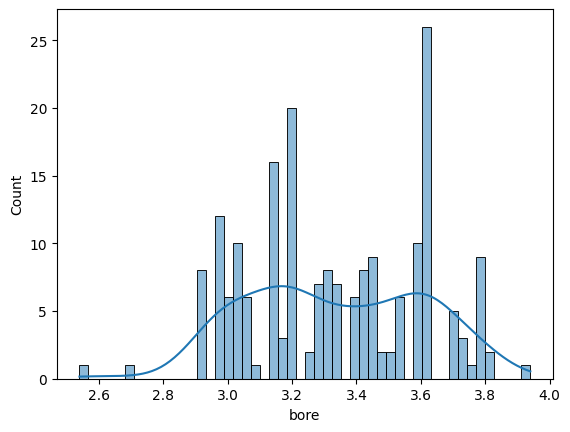

In [30]:
sns.histplot(x["bore"], kde=True,bins=50)

In [31]:
bore_Median = x["bore"].median()
bore_Median

3.31

In [32]:
x["bore"] = x["bore"].fillna(bore_Median)

In [33]:
x["bore"][51:60]

51    3.08
52    3.31
53    3.31
54    3.31
55    3.31
56    3.39
57    3.39
58    3.39
59    3.39
Name: bore, dtype: float64

In [34]:
x.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
dtype: int64

In [35]:
x1["stroke"][51:60]

51    3.15
52     NaN
53     NaN
54     NaN
55     NaN
56    3.39
57    3.39
58    3.39
59    3.39
Name: stroke, dtype: object

In [36]:
x["stroke"] = x["stroke"].astype(float)

In [37]:
x["stroke"][51:60]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


51    3.15
52     NaN
53     NaN
54     NaN
55     NaN
56    3.39
57    3.39
58    3.39
59    3.39
Name: stroke, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='stroke', ylabel='Count'>

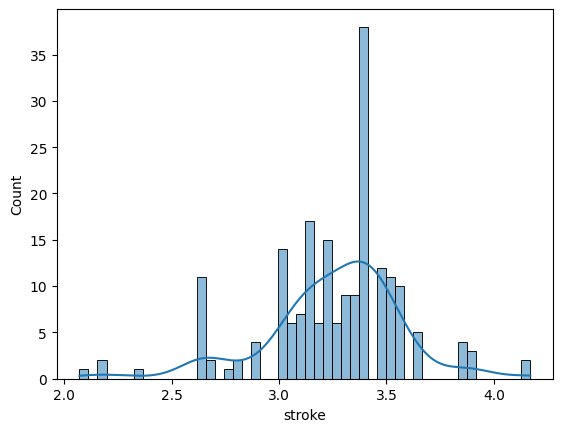

In [38]:
sns.histplot(x["stroke"], kde=True,bins=50)

In [39]:
stroke_Median = x["stroke"].median()
stroke_Median

3.29

In [40]:
x["stroke"] = x["stroke"].fillna(stroke_Median)

In [41]:
x["stroke"][51:60]

51    3.15
52    3.29
53    3.29
54    3.29
55    3.29
56    3.39
57    3.39
58    3.39
59    3.39
Name: stroke, dtype: float64

In [42]:
x["horsepower"] = x["horsepower"].astype("Int64")

In [43]:
x["horsepower"][124:130]

124     207
125     207
126    <NA>
127    <NA>
128     110
129     110
Name: horsepower, dtype: Int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='horsepower', ylabel='Count'>

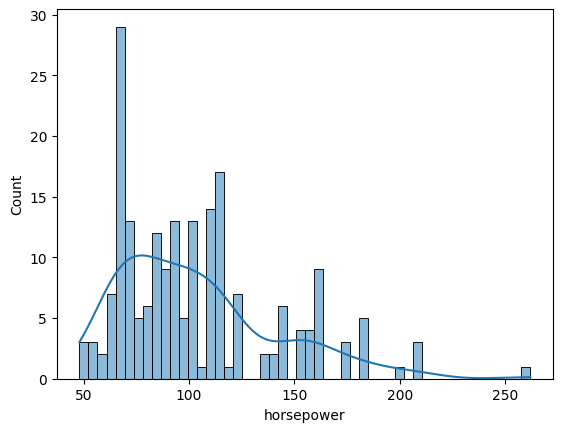

In [44]:
sns.histplot(x["horsepower"], kde=True,bins=50)

In [45]:
HP_Median = x["horsepower"].median()
HP_Median

95.0

In [46]:
HP_Median = int(HP_Median)
HP_Median

95

In [47]:
x["horsepower"] = x["horsepower"].fillna(HP_Median)

In [48]:
x["horsepower"][124:130]

124    207
125    207
126     95
127     95
128    110
129    110
Name: horsepower, dtype: Int64

In [49]:
x["peak-rpm"][124:130]

124    5900
125    5900
126     NaN
127     NaN
128    5250
129    5250
Name: peak-rpm, dtype: object

In [50]:
x["peak-rpm"] = x["peak-rpm"].astype("Int64")

In [51]:
x["peak-rpm"][124:130]

124    5900
125    5900
126    <NA>
127    <NA>
128    5250
129    5250
Name: peak-rpm, dtype: Int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='peak-rpm', ylabel='Count'>

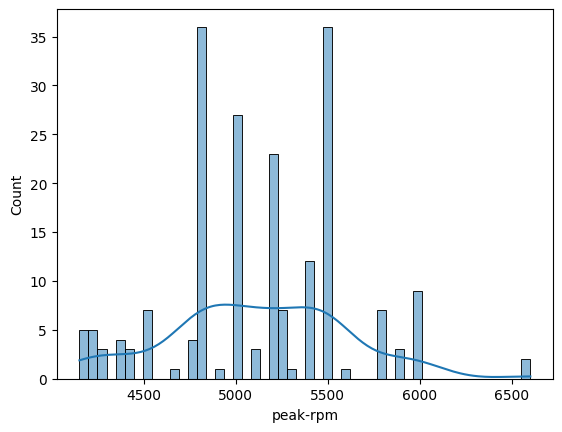

In [52]:
sns.histplot(x["peak-rpm"], kde=True,bins=50)

In [53]:
prpm_Median = x["peak-rpm"].median()
prpm_Median

5200.0

In [54]:
prpm_Median = int(prpm_Median)
prpm_Median

5200

In [55]:
x["peak-rpm"] = x["peak-rpm"].fillna(prpm_Median)

In [56]:
x["peak-rpm"][124:130]

124    5900
125    5900
126    5200
127    5200
128    5250
129    5250
Name: peak-rpm, dtype: Int64

In [57]:
x.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
dtype: int64

## One hot encoding for make coloumn

In [58]:
# for make Column
dummy_make = pd.get_dummies(x['make'], drop_first=True, prefix='make', prefix_sep=' ')
dummy_make

,make audi,make bmw,make chevrolet,make dodge,make honda,make isuzu,make jaguar,make mazda,make mercedes-benz,make mercury,...,make nissan,make peugot,make plymouth,make porsche,make renault,make saab,make subaru,make toyota,make volkswagen,make volvo
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
199,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [59]:
x.drop("make",axis=1,inplace=True)

In [60]:
x

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,115.0,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,115.0,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,115.0,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,164.0,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,2,164.0,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,-1,95.0,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25
198,-1,95.0,gas,std,four,sedan,rwd,front,109.1,188.8,...,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23
199,-1,95.0,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,six,145,idi,3.01,3.40,23.0,106,4800,26,27
200,-1,95.0,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25


In [61]:
x = pd.concat([x,dummy_make],axis=1)

In [62]:
x

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,make nissan,make peugot,make plymouth,make porsche,make renault,make saab,make subaru,make toyota,make volkswagen,make volvo
0,3,115.0,gas,std,two,convertible,rwd,front,88.6,168.8,...,False,False,False,False,False,False,False,False,False,False
1,3,115.0,gas,std,two,convertible,rwd,front,88.6,168.8,...,False,False,False,False,False,False,False,False,False,False
2,1,115.0,gas,std,two,hatchback,rwd,front,94.5,171.2,...,False,False,False,False,False,False,False,False,False,False
3,2,164.0,gas,std,four,sedan,fwd,front,99.8,176.6,...,False,False,False,False,False,False,False,False,False,False
4,2,164.0,gas,std,four,sedan,4wd,front,99.4,176.6,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,-1,95.0,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,False,False,False,False,False,False,False,False,False,True
198,-1,95.0,gas,std,four,sedan,rwd,front,109.1,188.8,...,False,False,False,False,False,False,False,False,False,True
199,-1,95.0,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,False,False,False,False,False,False,False,False,False,True
200,-1,95.0,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,False,False,False,False,False,False,False,False,False,True


## Label encoding for fuel-type and aspiration column

In [63]:
x["fuel-type"] = x["fuel-type"].map({"gas":0,"diesel":1})

In [64]:
x[103:110]

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,make nissan,make peugot,make plymouth,make porsche,make renault,make saab,make subaru,make toyota,make volkswagen,make volvo
103,1,231.0,0,std,two,hatchback,rwd,front,99.2,178.5,...,True,False,False,False,False,False,False,False,False,False
104,0,161.0,0,std,four,sedan,rwd,front,107.9,186.7,...,False,True,False,False,False,False,False,False,False,False
105,0,161.0,1,turbo,four,sedan,rwd,front,107.9,186.7,...,False,True,False,False,False,False,False,False,False,False
106,0,115.0,0,std,four,wagon,rwd,front,114.2,198.9,...,False,True,False,False,False,False,False,False,False,False
107,0,115.0,1,turbo,four,wagon,rwd,front,114.2,198.9,...,False,True,False,False,False,False,False,False,False,False
108,0,161.0,0,std,four,sedan,rwd,front,107.9,186.7,...,False,True,False,False,False,False,False,False,False,False
109,0,161.0,1,turbo,four,sedan,rwd,front,107.9,186.7,...,False,True,False,False,False,False,False,False,False,False


In [65]:
x["aspiration"] = x["aspiration"].map({"std":0,"turbo":1})

In [66]:
x[20:32]

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,make nissan,make peugot,make plymouth,make porsche,make renault,make saab,make subaru,make toyota,make volkswagen,make volvo
20,1,118.0,0,0,two,hatchback,fwd,front,93.7,157.3,...,False,False,False,False,False,False,False,False,False,False
21,1,118.0,0,0,two,hatchback,fwd,front,93.7,157.3,...,False,False,False,False,False,False,False,False,False,False
22,1,118.0,0,1,two,hatchback,fwd,front,93.7,157.3,...,False,False,False,False,False,False,False,False,False,False
23,1,148.0,0,0,four,hatchback,fwd,front,93.7,157.3,...,False,False,False,False,False,False,False,False,False,False
24,1,148.0,0,0,four,sedan,fwd,front,93.7,157.3,...,False,False,False,False,False,False,False,False,False,False
25,1,148.0,0,0,four,sedan,fwd,front,93.7,157.3,...,False,False,False,False,False,False,False,False,False,False
26,1,148.0,0,1,four,sedan,fwd,front,93.7,157.3,...,False,False,False,False,False,False,False,False,False,False
27,-1,110.0,0,0,four,wagon,fwd,front,103.3,174.6,...,False,False,False,False,False,False,False,False,False,False
28,3,145.0,0,1,two,hatchback,fwd,front,95.9,173.2,...,False,False,False,False,False,False,False,False,False,False
29,2,137.0,0,0,two,hatchback,fwd,front,86.6,144.6,...,False,False,False,False,False,False,False,False,False,False


### label encoding for num-of-doors

In [67]:
x["num-of-doors"].unique()

array(['two', 'four'], dtype=object)

In [68]:
x["num-of-doors"] = x["num-of-doors"].map({"two":0,"four":1})

In [69]:
x[:15]

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,make nissan,make peugot,make plymouth,make porsche,make renault,make saab,make subaru,make toyota,make volkswagen,make volvo
0,3,115.0,0,0,0,convertible,rwd,front,88.6,168.8,...,False,False,False,False,False,False,False,False,False,False
1,3,115.0,0,0,0,convertible,rwd,front,88.6,168.8,...,False,False,False,False,False,False,False,False,False,False
2,1,115.0,0,0,0,hatchback,rwd,front,94.5,171.2,...,False,False,False,False,False,False,False,False,False,False
3,2,164.0,0,0,1,sedan,fwd,front,99.8,176.6,...,False,False,False,False,False,False,False,False,False,False
4,2,164.0,0,0,1,sedan,4wd,front,99.4,176.6,...,False,False,False,False,False,False,False,False,False,False
5,2,115.0,0,0,0,sedan,fwd,front,99.8,177.3,...,False,False,False,False,False,False,False,False,False,False
6,1,158.0,0,0,1,sedan,fwd,front,105.8,192.7,...,False,False,False,False,False,False,False,False,False,False
7,1,115.0,0,0,1,wagon,fwd,front,105.8,192.7,...,False,False,False,False,False,False,False,False,False,False
8,1,158.0,0,1,1,sedan,fwd,front,105.8,192.7,...,False,False,False,False,False,False,False,False,False,False
9,2,192.0,0,0,0,sedan,rwd,front,101.2,176.8,...,False,False,False,False,False,False,False,False,False,False


### One-hot encoding for body-style column

In [70]:
x["body-style"].unique()


array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [71]:
dummy_body_style = pd.get_dummies(x['body-style'], drop_first=True, prefix='Body-Style', prefix_sep=' ')
x.drop("body-style",axis=1,inplace=True)
x = pd.concat([x,dummy_body_style],axis=1)


In [72]:
dummy_body_style.dtypes

Body-Style hardtop      bool
Body-Style hatchback    bool
Body-Style sedan        bool
Body-Style wagon        bool
dtype: object

### One-hot encoding for drive-wheels columns

In [73]:
x["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [74]:
dummy_drive_wheels = pd.get_dummies(x['drive-wheels'], drop_first=True, prefix='drive-wheels', prefix_sep=' ')
x.drop("drive-wheels",axis=1,inplace=True)
x = pd.concat([x,dummy_drive_wheels],axis=1)

### label encoding for engine-location column

In [75]:
x["engine-location"].unique()

array(['front', 'rear'], dtype=object)

In [76]:
x["engine-location"] = x["engine-location"].map({"front":0,"rear":1})

In [77]:
x["engine-location"]

0      0
1      0
2      0
3      0
4      0
      ..
197    0
198    0
199    0
200    0
201    0
Name: engine-location, Length: 202, dtype: int64

### One-hot encoding for engine-type column

In [78]:
x["engine-type"].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf'], dtype=object)

In [79]:
dummy_engine_type = pd.get_dummies(x['engine-type'], drop_first=True, prefix='engine-type', prefix_sep=' ')
x.drop("engine-type",axis=1,inplace=True)
x = pd.concat([x,dummy_engine_type],axis=1)

### encoding for num-of-cylinders column

In [80]:
x["num-of-cylinders"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [81]:
cyl = {
    "four": 4,
    "six": 6,
    "five": 5,
    "three": 3,
    "twelve":12,
    "two": 2,
    "eight": 8
}
type(cyl)

dict

In [82]:
x["num-of-cylinders"] = x["num-of-cylinders"].map(cyl)

In [83]:
x["num-of-cylinders"]

0      4
1      4
2      6
3      4
4      5
      ..
197    4
198    6
199    6
200    4
201    4
Name: num-of-cylinders, Length: 202, dtype: int64

### one-hot encoding for fuel-system column

In [84]:
dummy_fuel_system = pd.get_dummies(x['fuel-system'], drop_first=True, prefix='fuel-system', prefix_sep=' ')
x.drop("fuel-system",axis=1,inplace=True)
x = pd.concat([x,dummy_fuel_system],axis=1)

In [85]:
x

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,...,engine-type ohcf,engine-type ohcv,engine-type rotor,fuel-system 2bbl,fuel-system 4bbl,fuel-system idi,fuel-system mfi,fuel-system mpfi,fuel-system spdi,fuel-system spfi
0,3,115.0,0,0,0,0,88.6,168.8,64.1,48.8,...,False,False,False,False,False,False,False,True,False,False
1,3,115.0,0,0,0,0,88.6,168.8,64.1,48.8,...,False,False,False,False,False,False,False,True,False,False
2,1,115.0,0,0,0,0,94.5,171.2,65.5,52.4,...,False,True,False,False,False,False,False,True,False,False
3,2,164.0,0,0,1,0,99.8,176.6,66.2,54.3,...,False,False,False,False,False,False,False,True,False,False
4,2,164.0,0,0,1,0,99.4,176.6,66.4,54.3,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,-1,95.0,0,1,1,0,109.1,188.8,68.8,55.5,...,False,False,False,False,False,False,False,True,False,False
198,-1,95.0,0,0,1,0,109.1,188.8,68.9,55.5,...,False,True,False,False,False,False,False,True,False,False
199,-1,95.0,1,1,1,0,109.1,188.8,68.9,55.5,...,False,False,False,False,False,True,False,False,False,False
200,-1,95.0,0,1,1,0,109.1,188.8,68.9,55.5,...,False,False,False,False,False,False,False,True,False,False


## new feature representing ratio of horspower to curb weight

In [86]:
x["horsepower_curbWeight"] = x["horsepower"] / x["curb-weight"]

In [87]:
x

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,...,engine-type ohcv,engine-type rotor,fuel-system 2bbl,fuel-system 4bbl,fuel-system idi,fuel-system mfi,fuel-system mpfi,fuel-system spdi,fuel-system spfi,horsepower_curbWeight
0,3,115.0,0,0,0,0,88.6,168.8,64.1,48.8,...,False,False,False,False,False,False,True,False,False,0.043564
1,3,115.0,0,0,0,0,88.6,168.8,64.1,48.8,...,False,False,False,False,False,False,True,False,False,0.043564
2,1,115.0,0,0,0,0,94.5,171.2,65.5,52.4,...,True,False,False,False,False,False,True,False,False,0.054552
3,2,164.0,0,0,1,0,99.8,176.6,66.2,54.3,...,False,False,False,False,False,False,True,False,False,0.043646
4,2,164.0,0,0,1,0,99.4,176.6,66.4,54.3,...,False,False,False,False,False,False,True,False,False,0.040722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,-1,95.0,0,1,1,0,109.1,188.8,68.8,55.5,...,False,False,False,False,False,False,True,False,False,0.052476
198,-1,95.0,0,0,1,0,109.1,188.8,68.9,55.5,...,True,False,False,False,False,False,True,False,False,0.044489
199,-1,95.0,1,1,1,0,109.1,188.8,68.9,55.5,...,False,False,False,False,True,False,False,False,False,0.03295
200,-1,95.0,0,1,1,0,109.1,188.8,68.9,55.5,...,False,False,False,False,False,False,True,False,False,0.037231


In [88]:
x["horsepower_curbWeight"]

0      0.043564
1      0.043564
2      0.054552
3      0.043646
4      0.040722
         ...   
197    0.052476
198    0.044489
199     0.03295
200    0.037231
201    0.037231
Name: horsepower_curbWeight, Length: 202, dtype: Float64

## Linear Regression and KNN regression implimentation

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70,random_state=42)

In [91]:
x_train.shape

(141, 60)

In [92]:
y_train.shape

(141,)

### Linear Regression Model

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
lr_model = LinearRegression().fit(x_train,y_train)

In [95]:
lr_model.score(x_train,y_train)*100

96.95174265560594

In [96]:
lr_model.score(x_test,y_test)*100

93.34114047853855

In [97]:
lr_model.coef_

array([-8.54695474e+02, -1.03261485e+01,  3.38508949e+03,  4.49851455e+03,
        2.97724070e+02,  8.22188288e+03,  2.99777596e+02, -1.00908625e+02,
        6.39631208e+01, -3.52755775e+02, -8.73581958e+00, -8.89203903e+02,
        1.01737666e+02, -3.33505653e+03,  1.35387737e+02, -4.37100649e+02,
        2.99051032e+02,  2.17046785e+00, -1.84244974e+02,  1.82248445e+02,
        5.83776781e+03,  7.45870566e+03, -1.21275067e+02, -2.95788476e+03,
        2.09243618e+03, -5.69870437e+03, -9.03090529e+02,  5.14879346e+02,
        5.79991774e+03,  6.18073390e+02, -1.64337281e+03, -4.98292427e+02,
       -1.38766885e+03, -3.60465548e+03,  8.22188288e+03, -2.33194442e-08,
        6.74189422e+03, -4.43729104e+03, -2.41987156e+03,  3.63581766e+02,
       -1.93051822e+03, -1.28068136e+03, -4.69431525e+03, -4.55183674e+03,
       -5.12323900e+03, -8.06712256e+02,  2.22046549e+03, -1.50894392e+03,
       -1.22441492e+03,  3.78459184e+03,  6.69717130e+02,  3.32003372e+03,
        4.43669746e+03,  

In [98]:
lr_model.intercept_

43950.335902355655

In [99]:
from sklearn.metrics import mean_squared_error

In [100]:
y_pred = lr_model.predict(x_test)
lr_mse = mean_squared_error(y_test,y_pred)

In [101]:
lr_mse

5972565.730259834

### KNN Regression

In [102]:
from sklearn.neighbors import KNeighborsRegressor

In [103]:
knnR_model = KNeighborsRegressor().fit(x_train,y_train)

In [104]:
knnR_model.score(x_train,y_train)*100

86.62292569454195

In [105]:
knnR_model.score(x_test,y_test)*100

76.32838774984644

#### Hyperperameter tuning of KNN 

In [106]:
knnR_model_hy = KNeighborsRegressor(weights='distance')

In [107]:
knnR_model_hy.fit(x_train,y_train)

KNeighborsRegressor(weights='distance')

In [108]:
knnR_model_hy.score(x_train,y_train)*100

99.88672330461421

In [109]:
knnR_model_hy.score(x_test,y_test)*100

81.71088021263763